# Differential expression analysis


You have now successfully run the pipeline and checked the first quality control metrics of your fastq files. However, this is only primary analysis.

We would now like to understand exactly the difference between our groups of mice. 

Which pipeline would you use for this?


I would use the `nf-core/differentialabundance` pipeline.

Please paste here the command you used

In [6]:
!nextflow run nf-core/differentialabundance --input './data/samplesheet_complete.csv' --matrix './data/salmon.merged.gene_counts.tsv' --contrasts './data/contrast.csv' --outdir './results' -profile rnaseq,docker --max_cpus 4 --max_memory '7.GB'

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/differentialabundance` [trusting_woese] DSL2 - revision: 3dd360fed0 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : master
  runName                     : tr

Explain all the parameters you set and why you set them in this way.


- `--input`: The samplesheet associated the sample ids with the conditions that we want to compare.
- `--matrix`: The gene count table which was returned by the `nf-core/rnaseq` pipeline.
- `--contrasts`: Defines the variables that we want to compare in the Differential Expression Analysis.
- `--outdir`: The directory where the pipeline results will be saved.
- `--max_cpus`: Defines the maximum cpu usage for the run.
- `--max_memory`: Defines the maximum memory usage for the run.


How did the pipeline perform?

The pipeline is finished in 6 minutes and also works with the restricted cpu and memory resources.

Would you exclude any samples? If yes, which and why?

In the principal components plot, SNI_Sal_2 and SNI_Sal_4 are both clearly separated from the rest of the samples. They are also far away from all other samples in the clustering dendrogram. This is why I would exclude these two samples.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

1. One gene was downregulated (Gm22614) and one gene was upregulated (Cdr1) in the SNI_oxy group when compared to the Sham_Sal group.
2. Eight genes were upregulated in the Sham_oxy group when compared to the Sham_Sal group (Slc6a3, Adcyap1, Khdrbs2, Ret, Cdh12, Cdr1, Gm37407, RP23-301C7.2).
3. One gene was downregulated (Rsph4a), and 72 genes were upregulated in the SNI_Sal group when compared to the Sham_Sal group.


In the paper they state that the comparison of SNI_oxy versus Sham_sal groups resulted in 1,012 differentially expressed genes in the NAc, 1,116 genes in the mPFC and 533 genes in the VTA. SNI_sal triggered 1,457 DEGs in the NAc, 1,052 DEGs in the mPFC and 425 DEGs in the VTA as compared to Sham_sal controls. The Sham_oxy condition altered 2,609 genes in the NAc, 1,449 genes in the mPFC and 584 genes in the VTA as compared to Sham_sal controls.
 

We found far fewer DEGs than were mentioned in the paper. Also, in our case, the SNI_Sal vs Sham_sal comparison resulted in the largest number of DEGs but in the paper, the most DEGs were found in the comparison of Sham_oxy and Sham_sal.

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

- NAc: nucleus accumbens 
- mPFC: medial prefrontal cortex 
- VTA:  ventral tegmental area 

All three are reward-related brain regions.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Not really, they list DEGs underlying pathways for different brain regions but there is no mapping of gene to brain region.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

 It would not be enough to just provide the list of differentially expressed genes. It's important to communicate the statistical thresholds used to determine differential expression to understand the reliability of the identified genes. Also, determining the biological pathways or networks that the DEGs are involved in can provide insights into the biological processes affected by the experimental condition. Both of these things are also included in the paper.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentioned.

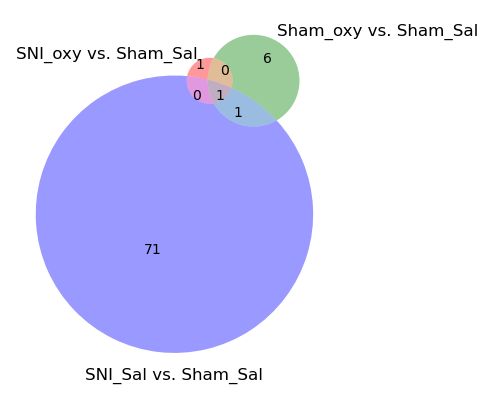

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = {'Gm22614', 'Cdr1'}
set2 = {'Slc6a3', 'Adcyap1', 'Khdrbs2', 'Ret', 'Cdh12', 'Cdr1', 'Gm37407', 'RP23-301C7.2'}
set3 = set((['Rsph4a', 'Cdr1', 'Adcyap1'] + ['_' + str(i) for i in range(70)]))

venn3([set1, set2, set3], ('SNI_oxy vs. Sham_Sal', 'Sham_oxy vs. Sham_Sal', 'SNI_Sal vs. Sham_Sal'))

plt.show()